## Array Indexing

Arrays form a fundamental type of scientific computing datatype.  Python, mainly through numpy, has specific facilities for manipulating, querying, and utilizing arrays.  This notebook shows a few of these capabilities.

First, the indexing convention of Python.    Python uses single brackets to contain index values.  A 2D array, say A[n,m], is indexed like a 2D matrix where the first index refers to the row number, and the second to the column number.   Remember that all indexes start with 0.

In [12]:
#Let us start by reading the sunspot CO2 data in as a large array
import numpy as np
myco2 = np.loadtxt('co2_mm_mlo.txt', skiprows=72)
#above gets all data as 2d array
#x,y,z = np.loadtxt('spot_num.txt', skiprows=1,usecols=(0,1,2),unpack=True)
#this gets only the first three columns (usecols) and sets equal to three 1d arrays (unpack)
type(myco2)

numpy.ndarray

Find the overall dimensions of the array by using the shape parameter for the numpy.ndarray type object.

In [13]:
myco2.shape

(701, 7)

What is the value in the third row, sixth column?

In [16]:
myco2[2,5]

314.70999999999998

It is interesting that this value in the actual file is 314.71.  What has happened?   Let us look at the type of this value -

In [17]:
type(myco2[2,5])

numpy.float64

Not surprisingly, this is read in as a double-precision floating point number, and so cannot represent the number precisely, but is off by 1 part in $10^{17}$, typical for double-precision.

One can use negative numbers to index values starting with the last elements.   For instance, the last element in our array is - 

In [18]:
myco2[-1,-1]

28.0

What happens if you use fewer index values than are necessary to describe the array?   You get a subarray.  For instance, the first row of our data is -

In [19]:
myco2[0]

array([  1.95800000e+03,   3.00000000e+00,   1.95820800e+03,
         3.15710000e+02,   3.15710000e+02,   3.14620000e+02,
        -1.00000000e+00])

The assumption is that the indexes present start with the first dimension, to reference a column instead, just replace the first dimension with ':' which is a range value meaning all indices.   So the third column is accessed through -

In [20]:
myco2[:,2]

array([ 1958.208,  1958.292,  1958.375,  1958.458,  1958.542,  1958.625,
        1958.708,  1958.792,  1958.875,  1958.958,  1959.042,  1959.125,
        1959.208,  1959.292,  1959.375,  1959.458,  1959.542,  1959.625,
        1959.708,  1959.792,  1959.875,  1959.958,  1960.042,  1960.125,
        1960.208,  1960.292,  1960.375,  1960.458,  1960.542,  1960.625,
        1960.708,  1960.792,  1960.875,  1960.958,  1961.042,  1961.125,
        1961.208,  1961.292,  1961.375,  1961.458,  1961.542,  1961.625,
        1961.708,  1961.792,  1961.875,  1961.958,  1962.042,  1962.125,
        1962.208,  1962.292,  1962.375,  1962.458,  1962.542,  1962.625,
        1962.708,  1962.792,  1962.875,  1962.958,  1963.042,  1963.125,
        1963.208,  1963.292,  1963.375,  1963.458,  1963.542,  1963.625,
        1963.708,  1963.792,  1963.875,  1963.958,  1964.042,  1964.125,
        1964.208,  1964.292,  1964.375,  1964.458,  1964.542,  1964.625,
        1964.708,  1964.792,  1964.875,  1964.958, 

Ranges using the ':' operator can be used for any index.   Note that the second value in the begin:end construct is one greater than the index used.  Columns 2-4 for rows 100-110 are given by -

In [30]:
myco2[99:110,1:4]

array([[  6.00000000e+00,   1.96645800e+03,   3.23750000e+02],
       [  7.00000000e+00,   1.96654200e+03,   3.22390000e+02],
       [  8.00000000e+00,   1.96662500e+03,   3.20370000e+02],
       [  9.00000000e+00,   1.96670800e+03,   3.18640000e+02],
       [  1.00000000e+01,   1.96679200e+03,   3.18100000e+02],
       [  1.10000000e+01,   1.96687500e+03,   3.19790000e+02],
       [  1.20000000e+01,   1.96695800e+03,   3.21080000e+02],
       [  1.00000000e+00,   1.96704200e+03,   3.22070000e+02],
       [  2.00000000e+00,   1.96712500e+03,   3.22500000e+02],
       [  3.00000000e+00,   1.96720800e+03,   3.23040000e+02],
       [  4.00000000e+00,   1.96729200e+03,   3.24420000e+02]])

A powerful way to index arrays is by supplying arrays as indexes.   In this case, the array values are used as individual indices.   For instance, to get the 2nd and 4th rows, we can use - 

In [34]:
myco2[[2,4],:]

array([[  1.95800000e+03,   5.00000000e+00,   1.95837500e+03,
          3.17500000e+02,   3.17500000e+02,   3.14710000e+02,
         -1.00000000e+00],
       [  1.95800000e+03,   7.00000000e+00,   1.95854200e+03,
          3.15860000e+02,   3.15860000e+02,   3.14980000e+02,
         -1.00000000e+00]])

## Array Creation Using Comprehensions

Python can create lists by using a mathematical formula coupled with a range operator.  For instance, if I wanted to create an array of the first 100 integers squared, I could use - 

In [45]:
squares=np.array([x**2 for x in range(100)])

In [46]:
squares[0:10]

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [47]:
type(squares)

numpy.ndarray

There are other ways to do this, but in general, this can be a useful mechanism for creating numerical arrays.    Another way to do this is as follows - 

In [50]:
squares2=np.arange(100)**2

In [51]:
squares2[0:10]

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In this case, we used the numpy arange function which creates an array of index values, then we simply squared the results using the exponentiation operator on a vector which performed an element by element calculation.

## Finding Array and Index Values

An extremely powerful technique for investigating arrays is to find out which elements match certain criteria.    This is achieved using another form of comprehension.  In this case, let us find large values of CO2 for the seasonally adjusted trend data -

In [54]:
highco2 = [x for x in myco2[:,5] if x > 400.0]

In [55]:
highco2

[400.39999999999998,
 400.56999999999999,
 400.45999999999998,
 400.89999999999998,
 400.73000000000002,
 401.04000000000002,
 401.67000000000002,
 402.30000000000001,
 402.64999999999998,
 402.36000000000001,
 403.27999999999997,
 403.23000000000002,
 404.54000000000002,
 404.31999999999999,
 404.47000000000003,
 403.99000000000001]

What if we instead wanted to note where these values were in the array for future use?  In this case, we can use the numpy where function which returns indices associated with the desired values - 

In [61]:
In [10]: bigind=np.where(myco2[:,5] > 400.0); bigind

(array([685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697,
        698, 699, 700]),)

Now, these index values can be used for further analysis.   What are the rows for all of these entrie?

In [62]:
myco2[bigind,:]

array([[[  2.01500000e+03,   4.00000000e+00,   2.01529200e+03,
           4.03280000e+02,   4.03280000e+02,   4.00400000e+02,
           2.70000000e+01],
        [  2.01500000e+03,   5.00000000e+00,   2.01537500e+03,
           4.03960000e+02,   4.03960000e+02,   4.00570000e+02,
           3.00000000e+01],
        [  2.01500000e+03,   6.00000000e+00,   2.01545800e+03,
           4.02800000e+02,   4.02800000e+02,   4.00460000e+02,
           2.80000000e+01],
        [  2.01500000e+03,   7.00000000e+00,   2.01554200e+03,
           4.01310000e+02,   4.01310000e+02,   4.00900000e+02,
           2.30000000e+01],
        [  2.01500000e+03,   8.00000000e+00,   2.01562500e+03,
           3.98930000e+02,   3.98930000e+02,   4.00730000e+02,
           2.80000000e+01],
        [  2.01500000e+03,   9.00000000e+00,   2.01570800e+03,
           3.97630000e+02,   3.97630000e+02,   4.01040000e+02,
           2.50000000e+01],
        [  2.01500000e+03,   1.00000000e+01,   2.01579200e+03,
           3.

In [33]:
type(spotstr['MON'])

pandas.core.series.Series

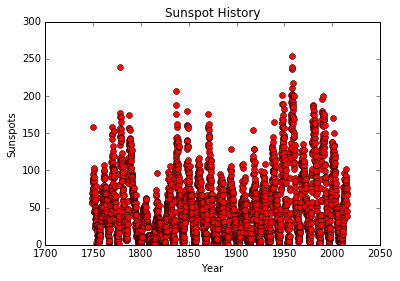

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
newdate = spotstr['YEAR'] + (spotstr['MON']-0.5)/12.      
plt.plot(newdate,spotstr['SSN'],'ro')  #the : means use all indices, can be used for formal range
plt.xlabel('Year')
plt.ylabel('Sunspots')
plt.title('Sunspot History')
plt.show()